# Python Data Challenge: Sales Data Analysis
## Scenario: 
- You're a Data Analyst for an e-commerce company. The company provides you with a dataset containing sales transactions from different regions, and your task is to analyze trends, clean data, and visualize insights.



#### Step 1: Read dataset from csv file

In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import calendar

In [2]:
df = pd.read_csv("sales_data.csv")

In [3]:
df

,order_id,order_date,product,category,price,quantity,region
0,88020724-646c-4bed-98c1-340e6b71fcff,2023-08-26,Basketball,Sports,144.54,2,Australia
1,a81b8638-3473-4831-8c8f-8141d50d7277,2023-08-20,Moisturizer,Beauty,839.21,6,South America
2,a1d9d8a5-2959-415d-b151-1b077fed7300,2024-03-21,Smartwatch,Electronics,607.68,10,South America
3,e8337b71-9a9b-479d-ae07-adbf5eedcb13,2024-06-05,Smartphone,Electronics,489.66,7,Asia
4,9056331e-7ec9-4718-b643-67bd7c641668,2023-08-06,Moisturizer,Beauty,489.33,2,Australia
...,...,...,...,...,...,...,...
4995,258ecdb8-6bb0-4467-a8d7-3a9afec6682f,2023-03-17,Lipstick,Beauty,186.86,2,Asia
4996,3d0baf17-258c-4ed7-8cc0-5be3e8bf2b05,2023-10-27,Air Conditioner,Home Appliances,914.58,9,South America
4997,48d875ce-c730-4334-b053-638692df9986,2023-11-10,Vacuum Cleaner,Home Appliances,928.40,3,South America
4998,42e7e063-a5d8-4422-a105-d1939387d36c,2023-10-25,Basketball,Sports,357.36,4,Australia


#### Step2: Check for missing value

In [4]:
df.isnull().sum()

order_id      0
order_date    0
product       0
category      0
price         0
quantity      0
region        0
dtype: int64

In [5]:
df['total'] = df['price'] * df['quantity']

#### Step3: Convert Order Date to DateTime format and extract year, month, and day of the week

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month_name()
df['year']=df['order_date'].dt.to_period('Y')
df['day']=df['order_date'].dt.day_name()

In [7]:
df.head()

,order_id,order_date,product,category,price,quantity,region,total,month,year,day
0,88020724-646c-4bed-98c1-340e6b71fcff,2023-08-26,Basketball,Sports,144.54,2,Australia,289.08,August,2023,Saturday
1,a81b8638-3473-4831-8c8f-8141d50d7277,2023-08-20,Moisturizer,Beauty,839.21,6,South America,5035.26,August,2023,Sunday
2,a1d9d8a5-2959-415d-b151-1b077fed7300,2024-03-21,Smartwatch,Electronics,607.68,10,South America,6076.80,March,2024,Thursday
3,e8337b71-9a9b-479d-ae07-adbf5eedcb13,2024-06-05,Smartphone,Electronics,489.66,7,Asia,3427.62,June,2024,Wednesday
4,9056331e-7ec9-4718-b643-67bd7c641668,2023-08-06,Moisturizer,Beauty,489.33,2,Australia,978.66,August,2023,Sunday


#### Step4: Compute total revenue per region and identify the highest-grossing region.

In [23]:
region = df.groupby(by="region")
revenue = []
for name,r in region:
    revenue.append({
        "name":  name, 
         "totalrevenue": int(np.sum(r['total']))
    })
revenue = pd.DataFrame(revenue)

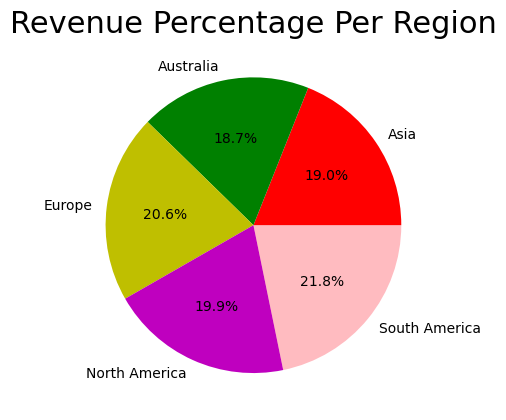

In [24]:
plt.pie(revenue['totalrevenue'], colors=['r','g','y','m','#f345'], autopct='%.1f%%', labels=revenue['name'], radius=1)
plt.title("Revenue Percentage Per Region", fontsize=22)
plt.show()

- ####  South America leads as the highest-grossing region, contributing 21.2% of total sales, while Australia has the lowest contribution, accounting for 18.8% of the total sales

## Step 5: Find the top 5 best-selling products based on revenue and quantity sold.


In [10]:
product = df.groupby(by='product')
product_detail = []
for name, pr in product:
    product_detail.append({
        'name':name,
        'quantity': np.sum(pr['quantity']),
        'price':np.sum(pr['total'])
    })
product_detail = pd.DataFrame(product_detail)

In [12]:
# Top 5 best selling product based on price
best_selling_on_price = product_detail.sort_values(by='price', ascending=False).head(5).reset_index()
# Top 5 best selling product based on quantity 
best_selling_on_quantity = product_detail.sort_values(by='quantity', ascending=False).head(5).reset_index()

In [15]:
best_selling_on_price

,index,name,quantity,price
0,16,Sneakers,1446,775398.13
1,7,Lipstick,1469,752720.92
2,19,Vacuum Cleaner,1488,748510.17
3,13,Shampoo,1548,746577.38
4,3,Headphones,1428,745023.10


In [16]:
best_selling_on_quantity

,index,name,quantity,price
0,13,Shampoo,1548,746577.38
1,8,Microwave,1508,726707.01
2,5,Jeans,1506,743553.22
3,19,Vacuum Cleaner,1488,748510.17
4,7,Lipstick,1469,752720.92


- #### It is clear that smartphones are the top-selling product based on the revenue they generate, while shampoo leads in terms of the quantity sold.

## Step 6: Identify seasonal sales trends by grouping data by month.

In [54]:
monthly_sales = df.groupby(by=['month', 'product'])
monthly_sales_detail=[]
for name, sales in monthly_sales:
    monthly_sales_detail.append({
        'month': name[0],
        'product':name[1], 
        'quantity_sold': np.sum(sales['quantity']),
        'revenue_generate':np.sum(sales['total'])
    })
monthly_sales_detail = pd.DataFrame(monthly_sales_detail)

In [55]:
monthly_sales_detail = monthly_sales_detail.sort_values(by='month', key=lambda x: x.map({name: idx for idx, name in enumerate(calendar.month_name)}))

#  Line Plot for Revenue by Month (Overall Trend)

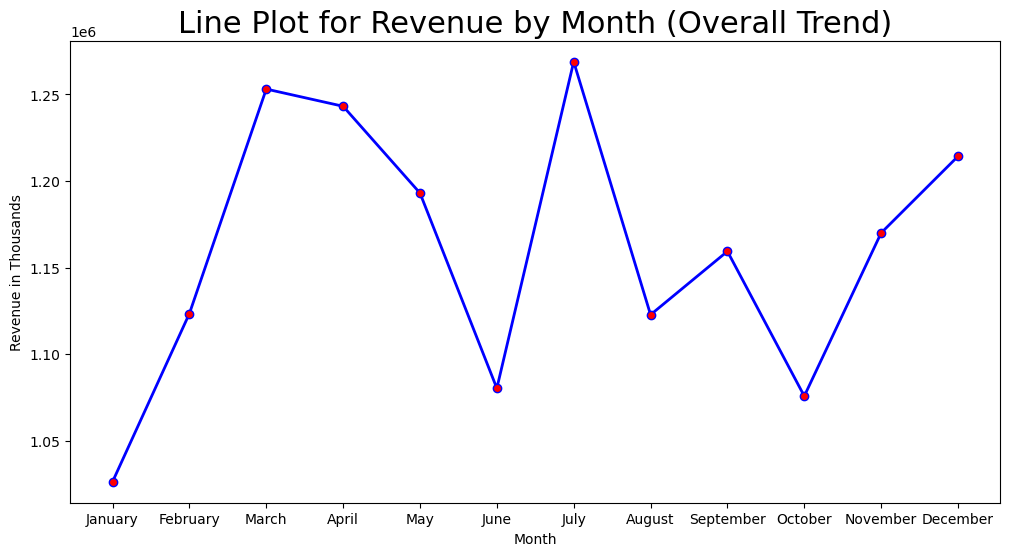

In [60]:
month_names = [calendar.month_name[i] for i in range(1, 13)]
overall_trend = monthly_sales_detail.groupby(by='month')['revenue_generate'].sum()
overall_trend_sorted = overall_trend.reindex(month_names)
plt.figure(figsize=(12, 6))
plt.title('Line Plot for Revenue by Month (Overall Trend)',fontsize=22)
plt.xlabel('Month')
plt.ylabel('Revenue in Thousands')
plt.plot(overall_trend_sorted, marker='o', color='b', linewidth=2, markersize=6, linestyle='-',markerfacecolor='r')
plt.show()

- #### This line plot illustrates the fluctuating revenue generated by the company. From the plot, we can observe that the first three months of the year show strong sales performance. However, in April and May, there is a slight decline, followed by a significant drop in revenue during June. Sales pick up again in July, reaching their peak for the year, but then begin to decrease once more. Towards the end of the year, sales rise again, only for a sharp decline to occur in January. This uneven trend suggests that the company struggles with consistent sales, possibly due to insufficient marketing efforts, and there seems to be a lack of consistency in selling the same products over time.

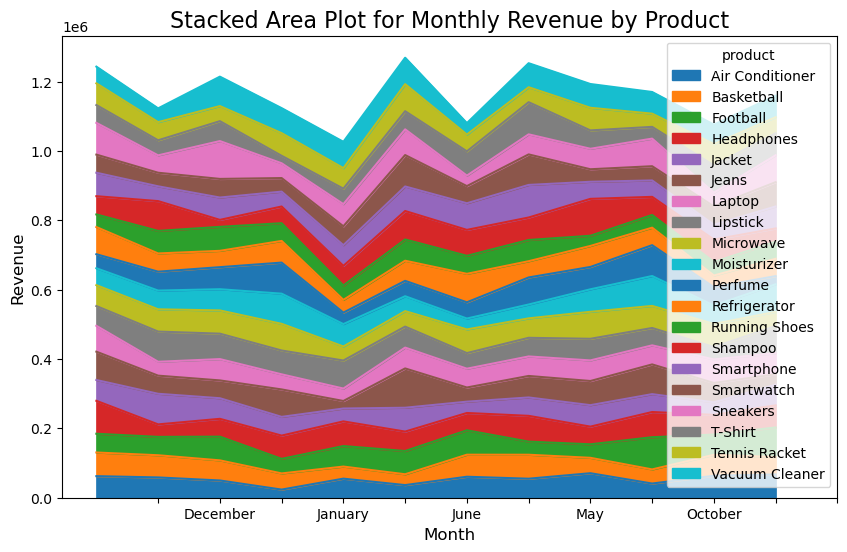

In [79]:
pivot_revenue = monthly_sales_detail.pivot_table(index='month', columns='product', values='revenue_generate', aggfunc='sum')
pivot_revenue.plot(kind='area',stacked=True, figsize=(10,6))
plt.title('Stacked Area Plot for Monthly Revenue by Product', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(range(1, 13)) 
plt.show()